# Lending Club Case Study

## About
 • A Consumer finance company is into various types of loans to urban customers.


• The company is trying to reach a decision whether to give a loan to a certain individual or not, thus reducing two types of risks:

• If the person is likely to repay the loan, then not approving the loan will result in loss of business

• If the person is not likely to repay the loan, then approving the loan will result in financial loss

## Risk Assessment

• A company can either choose to accept or reject the loan application. While accepting the loan application, there are various scenarios

• The customer has fully paid the loan

• There is a current loan on going

• Charged off: the customer has missed or delayed some payments for an existing loan

## Objectives

• Based on data analysis, we try and predict which parameters about the customer such as age, monthly income, loan amount may be possible indicators to indicate as to which customer should be given a loan.


In [172]:
# importing required libraries
import numpy as np
import pandas as pd
from pathlib import Path
# importing matplotlib
import matplotlib.pyplot as plt

# display plots in the notebook itself
%matplotlib inline

#import the necessary libraries
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from scipy.special import jv

# Display all rows and all columns
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

In [173]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## STEP 1. Understanding the Data

### Loading Test Data using loan.csv file

In [174]:
df = pd.read_csv('/content/drive/MyDrive/lending_club_study/LendingClubCaseStudy/loan.csv', low_memory=False)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Checking the Shape of the data frame

In [175]:
df.shape

(39717, 111)

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


### Checking the null value present in each column of the data frame and sorting the values on basis count of Null values in Descending order

In [177]:
df.isnull().sum().sort_values(ascending=False)

,0
verification_status_joint,39717
annual_inc_joint,39717
mo_sin_old_rev_tl_op,39717
mo_sin_old_il_acct,39717
bc_util,39717
...,...
delinq_amnt,0
policy_code,0
earliest_cr_line,0
delinq_2yrs,0


### Removing the Unnecessary columns from Data frame

##### 1) Many columns are having Null values equal to the shape of the dataframe
##### 2) Hence, removing the all thsese columns as it will add no values in the analysis.

In [178]:
df.dropna(axis=1, how='all', inplace=True)

In [179]:
df.shape

(39717, 57)

#### If any column is having only one value then checking those columns and removing it from the data frame. As it will not add value in the analysis.

In [180]:
df.nunique().sort_values(ascending=False)

,0
id,39717
member_id,39717
url,39717
total_pymnt,37850
total_pymnt_inv,37518
total_rec_int,35148
last_pymnt_amnt,34930
emp_title,28820
desc,26526
revol_bal,21711


### 1) Below mentioned columns having only one value.

- pymnt_plan
- initial_list_status
- collections_12_mths_ex_med
- policy_code
- application_type
- acc_now_delinq
- chargeoff_within_12_mths
- delinq_amnt
- tax_liens

### 2) Below mentioned columns having all the unique values hence it will also not add value in the analysis.

- id
- member_id
- url

In [181]:
# Dropping all the columns which is either having all the unique values or only single values in all the columns

df.drop(["pymnt_plan",
        "initial_list_status",
        "collections_12_mths_ex_med",
        "policy_code",
        "application_type",
        "acc_now_delinq",
        "chargeoff_within_12_mths",
        "delinq_amnt",
        "tax_liens",
        "id",
        "member_id",
        "url"], axis=1, inplace=True)

#### Checking the shape after removing the column

In [182]:
df.shape

(39717, 45)

### Checking the different loan statuses

In [183]:
df['loan_status'].value_counts()

,count
loan_status,
Fully Paid,32950
Charged Off,5627
Current,1140


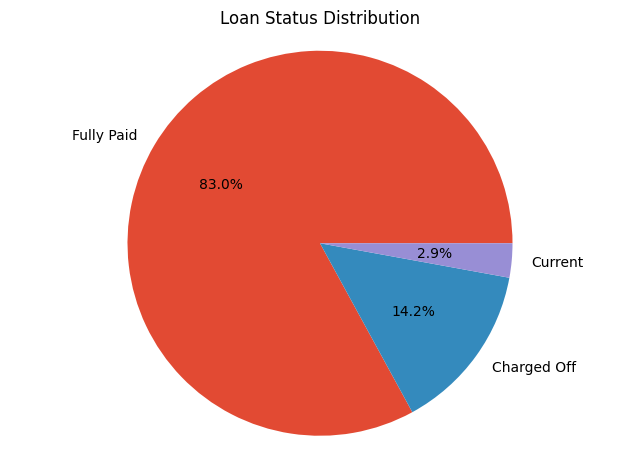

In [184]:
df['loan_status'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel("")
plt.axis('equal')
plt.title("Loan Status Distribution",)
plt.show()

### Remove rows which are not relevant for RISK analysis

- Rows with loan status 'Current' are not valid for analysis in this context for RISK analysis.
- As "Current" users loan is still inprogress.
- Hence removing the rows with status "Current".

In [185]:
# Rows with loan status with 'Current' are removed.

df = df[df['loan_status'] != "Current"]
df['loan_status'].value_counts()

,count
loan_status,
Fully Paid,32950
Charged Off,5627


#### Check the null values in the dataframe

In [186]:
df.isnull().sum().sort_values(ascending=False)

,0
next_pymnt_d,38577
mths_since_last_record,35837
mths_since_last_delinq,24905
desc,12529
emp_title,2386
emp_length,1033
pub_rec_bankruptcies,697
last_pymnt_d,71
revol_util,50
title,11


## Dropping Columns with NULL Values.
- It was notices that there are many columns having more than 50% null values.
- These Columns that can not be considered as driving factors and would not be useful in our analysis.
- These columns should be also dropped.

In [187]:
df.drop(["next_pymnt_d",
         "mths_since_last_record",
         "desc","emp_title",
         "last_pymnt_d",
         "title",
         "last_credit_pull_d",
         "addr_state",
         "total_pymnt_inv",
         "funded_amnt",
         "revol_bal",
         "out_prncp",
         "total_pymnt",
         "total_rec_prncp",
         "total_rec_int",
         "total_rec_late_fee",
         "recoveries",
         "collection_recovery_fee",
         "last_pymnt_amnt"], axis = 1, inplace = True)
df.shape

(38577, 26)

## STEP 2. Data Cleaning

As Part of data cleaning we will perform below mentioned steps:

* Fix/handle missing values
* Stadardize units
* Remove Extra characters
* Standardise case
* Standardize format (date format - YYYY-MM-DD)
* Remove Outliers

In [188]:
# Checking null values in the data frame
df.isnull().sum().sort_values(ascending=False)

,0
mths_since_last_delinq,24905
emp_length,1033
pub_rec_bankruptcies,697
revol_util,50
zip_code,0
out_prncp_inv,0
total_acc,0
pub_rec,0
open_acc,0
inq_last_6mths,0


In [189]:
# Checking the % of null values in "mths_since_last_delinq" column
round(df["mths_since_last_delinq"].isna().sum() / df.shape[0], 2) * 100

65.0

In [190]:
# As 65% of the values in the "mths_since_last_delinq" column are null, hence dropping this column
df.drop(["mths_since_last_delinq"], axis = 1, inplace = True)
df.shape

(38577, 25)

In [191]:
# emp_length column is having 1033 null value
# Fixing the null value in emp_length column
df["emp_length"].value_counts()

,count
emp_length,
10+ years,8488
< 1 year,4508
2 years,4291
3 years,4012
4 years,3342
5 years,3194
1 year,3169
6 years,2168
7 years,1711


- Most occurred category in the "emp_length" column is "10+ years"
- Hence, we can replace null values with "10+ years"

In [192]:
# Replacing the null values with "10+ years"
df["emp_length"] = df["emp_length"].fillna(df["emp_length"].mode()[0])
df["emp_length"].value_counts()

,count
emp_length,
10+ years,9521
< 1 year,4508
2 years,4291
3 years,4012
4 years,3342
5 years,3194
1 year,3169
6 years,2168
7 years,1711


In [193]:
df.isnull().sum().sort_values(ascending=False)

,0
pub_rec_bankruptcies,697
revol_util,50
purpose,0
out_prncp_inv,0
total_acc,0
pub_rec,0
open_acc,0
inq_last_6mths,0
earliest_cr_line,0
delinq_2yrs,0


In [194]:
# Calculate percentage of delinq_2yrs for non zero
delinq_df_2yrs = df[df['delinq_2yrs']>0]
percentage = (delinq_df_2yrs.shape[0])/(df['delinq_2yrs'].shape[0])
print('Non Zero Values delinq_2yrs ->', percentage*100)

Non Zero Values delinq_2yrs -> 10.86398631308811


In [195]:
# Dropping delinq_2yrs as it has more than 90% of zero values
df.drop(["delinq_2yrs"], axis = 1, inplace = True)

##### Dropping column "out_prncp_inv" as it is having null value.
##### Dropping column "pub_rec_bankruptcies" as most of its value having zero which will not add value in the analysis.

In [196]:
# List of the columns which are not required for the analysis

df.drop(['out_prncp_inv',
'pub_rec_bankruptcies'
], axis = 1, inplace = True)

In [197]:
# Define common functions here

def format_data(data):
    if int(data.split('-')[1]) < 40:
        return str('20'+data.split('-')[1]+'-'+data.split('-')[0]+'-'+'1')
    else:
        return str('19'+data.split('-')[1]+'-'+data.split('-')[0]+'-'+'1')

In [198]:
# Removing the rows with null value of "revol_util" column as it will affect the anaysis if
df = df[~df['revol_util'].isnull()]
df.loc[:, 'revol_util'] = pd.to_numeric(df['revol_util'].apply(lambda item: item.replace('%', '')), errors='coerce')

In [199]:
# Verifying if all null values are removed
df['int_rate'] = df['int_rate'].apply(lambda item: item.replace('%', ''))

In [200]:
# Add prefix value as first day of the month and adding prefix 19,20 in the year
df['issue_d'] = df['issue_d'].apply(lambda item: format_data(item))
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda item: format_data(item))

In [201]:
# Convert to Datetime columm
df['issue_d']=pd.to_datetime(df['issue_d'].astype(str), format='%Y-%b-%d', errors='coerce')
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'].astype(str), format='%Y-%b-%d', errors='coerce')

In [202]:
# Round off funded_amnt_inv to 2 decimel places
df['funded_amnt_inv'] = df['funded_amnt_inv'].round(2)

In [203]:
# Converting terms to years and converting it to number of years
df['term'].value_counts()
df['term'] = df['term'].apply(lambda item: int(item.replace('months','').strip()))
df['term'] = df['term']/12

In [204]:
# Convert type to int64 from float64 and object as float64
df['annual_inc'] = df['annual_inc'].astype('int64')
df['term'] = df['term'].astype('int64')
df['int_rate'] = df['int_rate'].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38527 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   loan_amnt            38527 non-null  int64         
 1   funded_amnt_inv      38527 non-null  float64       
 2   term                 38527 non-null  int64         
 3   int_rate             38527 non-null  float64       
 4   installment          38527 non-null  float64       
 5   grade                38527 non-null  object        
 6   sub_grade            38527 non-null  object        
 7   emp_length           38527 non-null  object        
 8   home_ownership       38527 non-null  object        
 9   annual_inc           38527 non-null  int64         
 10  verification_status  38527 non-null  object        
 11  issue_d              38527 non-null  datetime64[ns]
 12  loan_status          38527 non-null  object        
 13  purpose              38527 non-null 

In [205]:
# Filter columns having issue_d lesser than reported credited date (Validating Business Rules)
df = df[df['issue_d'] > df['earliest_cr_line']]

### Remove Outliers

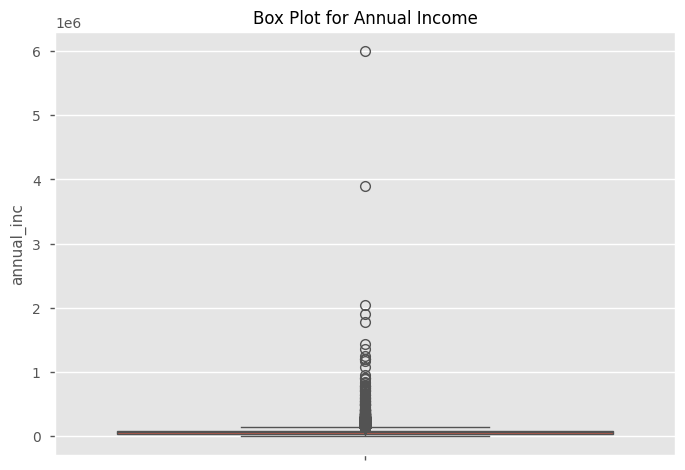

In [206]:
plt.style.use("seaborn-v0_8-notebook")
# plt.style.available
sns.boxplot(df['annual_inc'])
plt.title("Box Plot for Annual Income")
plt.show()

#### As there is too many outliers which is too high. Hence, lets take quantile of 95

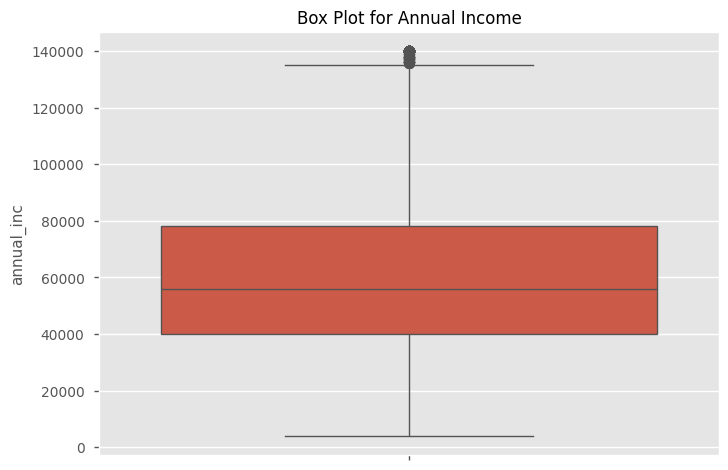

In [207]:
quantile = df['annual_inc'].quantile(0.95)
df = df[df['annual_inc'] <= quantile]
sns.boxplot(df['annual_inc'])
plt.title("Box Plot for Annual Income")
plt.show()

### Now checking for the loan amount column

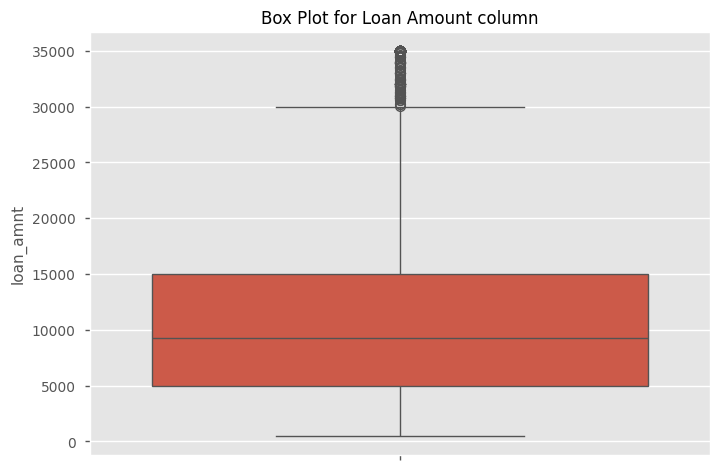

In [208]:
sns.boxplot(df['loan_amnt'])
plt.title("Box Plot for Loan Amount column")
plt.show()

In [209]:
# As this looks like a true outliers and the value is not varying to that much, keeping it as is
df['loan_amnt'].quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

,loan_amnt
0.750,15000.0
0.900,20000.0
0.950,25000.0
0.970,25475.0
0.975,28000.0
0.980,30000.0
0.990,35000.0
1.000,35000.0


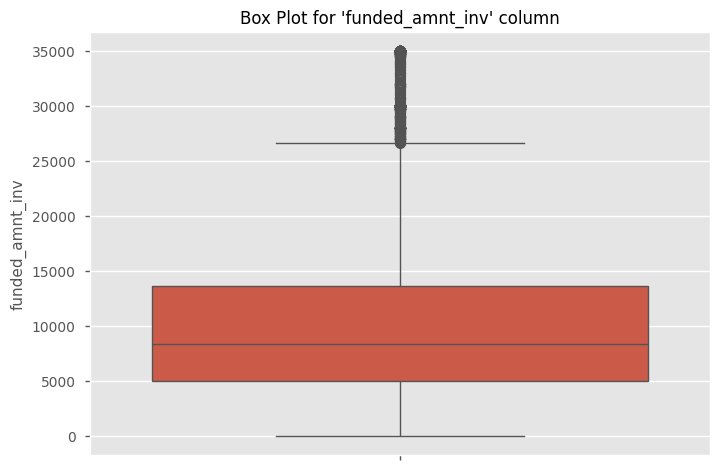

In [210]:
sns.boxplot(df['funded_amnt_inv'])
plt.title("Box Plot for 'funded_amnt_inv' column")
plt.show()

In [211]:
# There are a few outliers but these may not affect our calculations too much, keeping them as is
df['funded_amnt_inv'].quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

,funded_amnt_inv
0.750,13650.0000
0.900,19750.0000
0.950,23949.2875
0.970,24975.0000
0.975,25350.0000
0.980,27953.2850
0.990,31966.7995
1.000,35000.0000


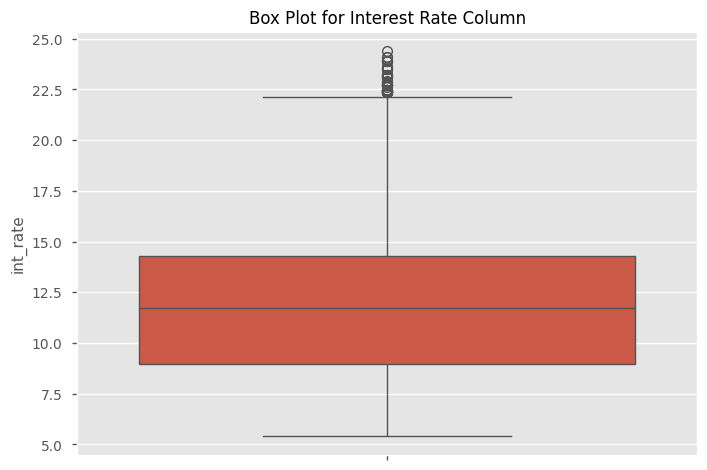

In [212]:
sns.boxplot(df['int_rate'])
plt.title("Box Plot for Interest Rate Column")
plt.show()

In [213]:
df['int_rate'].quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

,int_rate
0.750,14.27
0.900,16.77
0.950,18.25
0.970,19.29
0.975,19.42
0.980,19.91
0.990,20.89
1.000,24.40


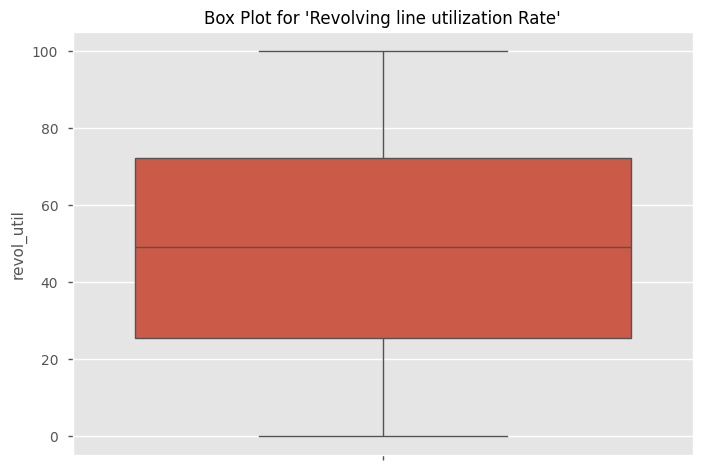

In [214]:
sns.boxplot(df['revol_util'])
plt.title("Box Plot for 'Revolving line utilization Rate'")
plt.show()

### Derived Columns
- Creating issue_year and issue_month columns which have been derived from issue_d column to separate out month and year

In [215]:
df['issue_year'], df['issue_month'] = df['issue_d'].dt.year, df['issue_d'].dt.month

## STEP3: Analyze data

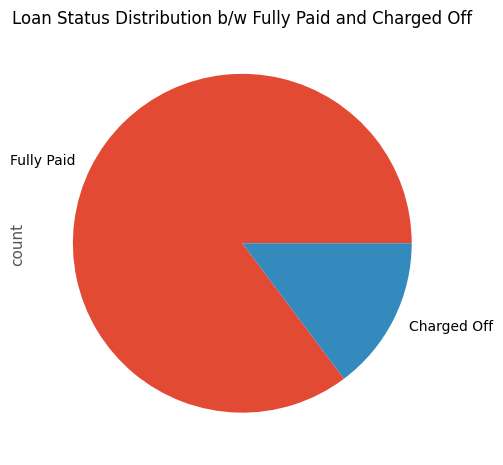

In [216]:
df['loan_status'].value_counts().plot.pie()
plt.title("Loan Status Distribution b/w Fully Paid and Charged Off")
plt.show()

In [217]:
# Check for if any defaulted values for the 'Fully paid' loan status.
fully_paid = df[df['loan_status']== 'Fully Paid']

fully_paid.shape

(31204, 24)

### Plotting Pair plot to analyse data

In [218]:
fully_paid['earliest_cr_line'].sort_values(ascending=False)

,earliest_cr_line
521,2008-11-01
2960,2008-10-01
2115,2008-09-01
1450,2008-09-01
6326,2008-09-01
...,...
13975,1956-09-01
22031,1954-11-01
6118,1954-10-01
15269,1950-12-01


Rules:
- Since the last date for fully paid customer is Nov 2008 and defaulted can be max for 7 years.
- So this can be considered that all the fully paid customers are not defaulted.
- Now lets analyze the charged off loan status who are being termed as defaulted

In [219]:
charged_off = df[df['loan_status']== 'Charged Off']

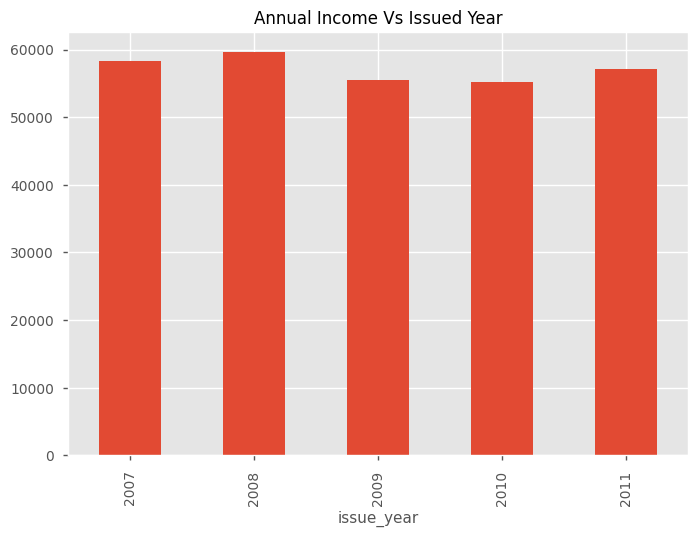

In [220]:
charged_off.groupby(['issue_year'])['annual_inc'].mean().plot.bar()
plt.title("Annual Income Vs Issued Year")
plt.show()

#### Using various plots using group to analyze the columns to derive conclusions

<Figure size 1500x1500 with 0 Axes>

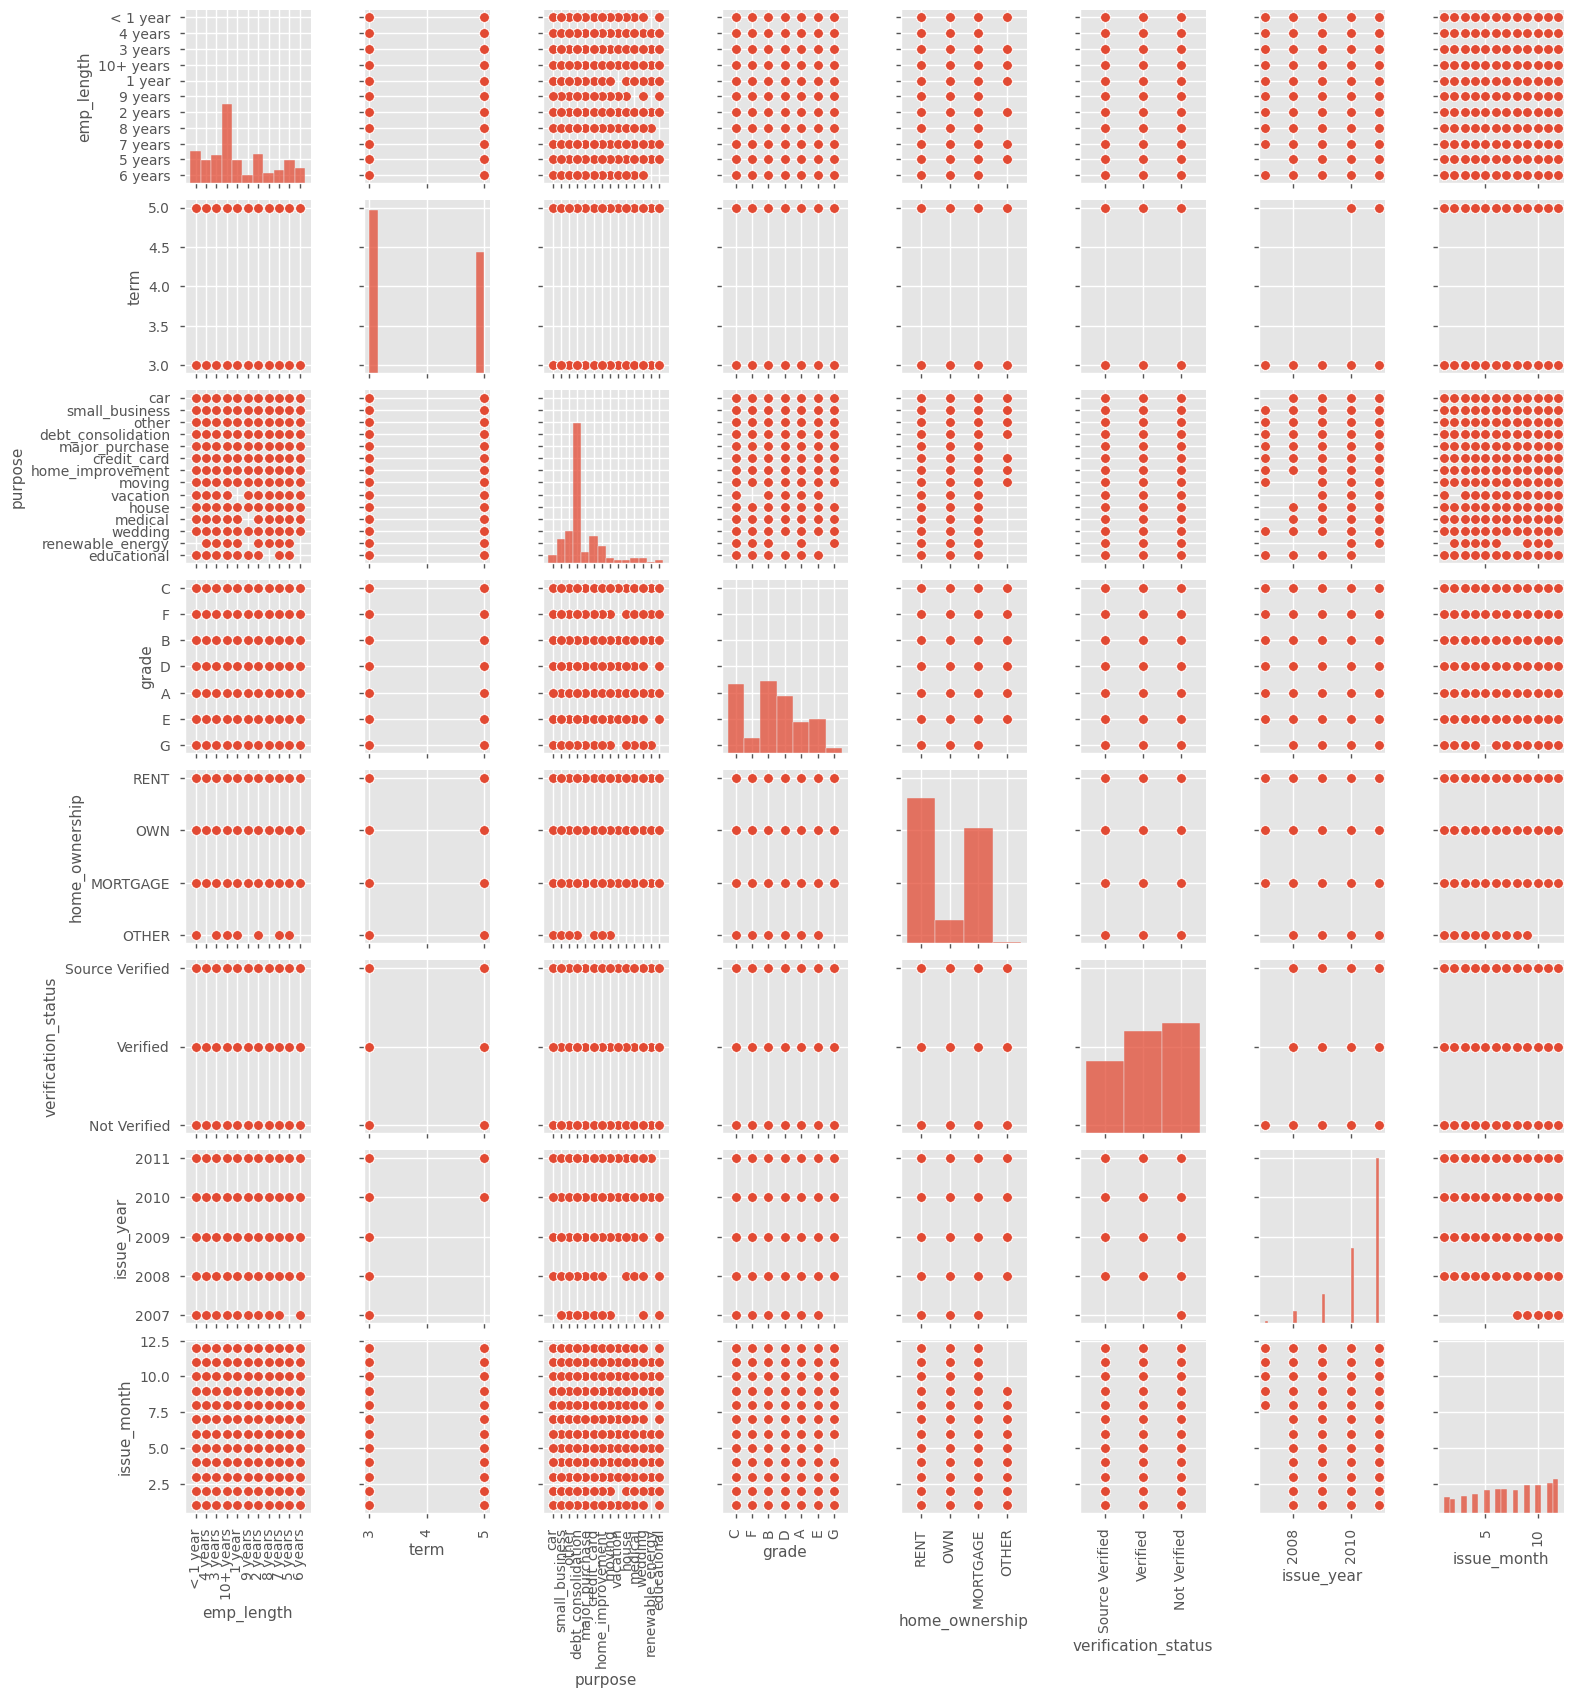

In [221]:
# plt.style.use("ggplot")
plt.figure(figsize=(15, 15))
g= sns.pairplot(charged_off, hue_order="smoker",markers=["o", "s"], vars=['emp_length', 'term','purpose', 'grade','home_ownership', 'verification_status', 'issue_year', 'issue_month'], height=2)
for ax in g.axes.flat:
    ax.tick_params(axis='x', labelrotation=90)
plt.show()


### Observations for bivariant Analysis


* Customers with 3 years Term have defaulted the most.
* Installment increases with Issue year, Funded amount Invoiced and interest Rate.
* Stagnant loan disbursement amount in intial years.
* Loan amount increases by ~5k in 2011 onwards.
* Year 2007-2008 annual income of customers are more or less same; even after 2011, with upward trend in year 2009.

### Employee - years in Job

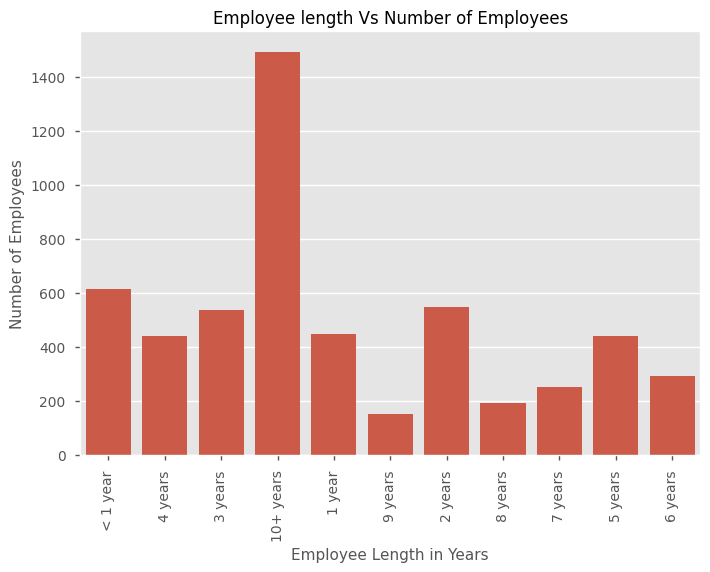

In [222]:
sns.countplot(x='emp_length', data=charged_off)
plt.xticks(rotation=90)
plt.ylabel("Number of Employees")
plt.xlabel("Employee Length in Years")
plt.title("Employee length Vs Number of Employees")
plt.show()

### Purpose of Loan

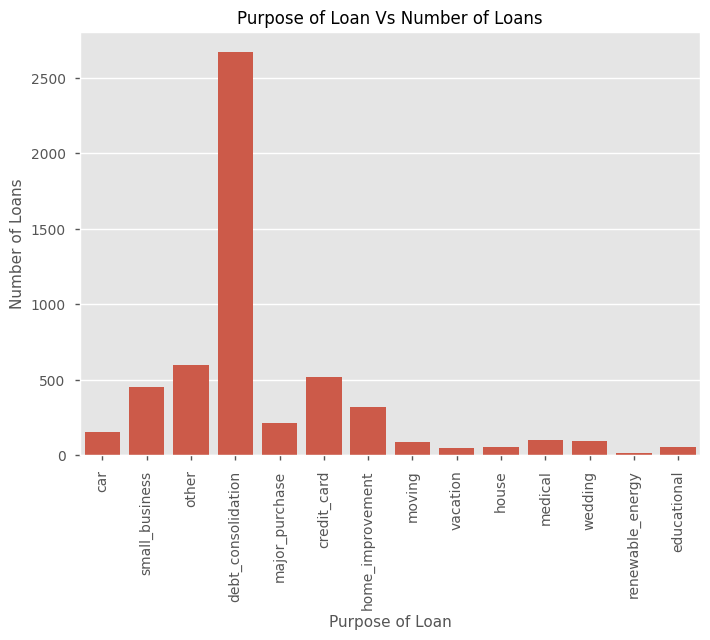

In [223]:
sns.countplot(x='purpose', data=charged_off)
plt.xticks(rotation=90)
plt.ylabel("Number of Loans")
plt.xlabel("Purpose of Loan")
plt.title("Purpose of Loan Vs Number of Loans")
plt.show()

### Loan Grade

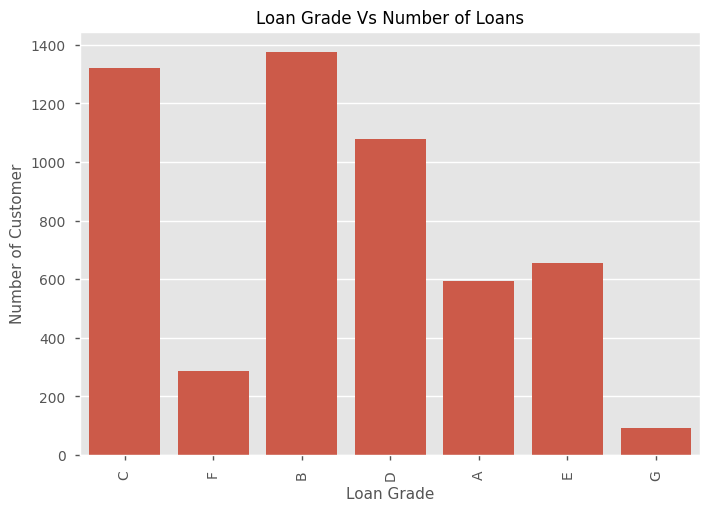

In [224]:
sns.countplot(x='grade', data=charged_off)
plt.xticks(rotation=90)
plt.ylabel("Number of Customer")
plt.xlabel("Loan Grade")
plt.title("Loan Grade Vs Number of Loans")
plt.show()

### Home Ownership of customers

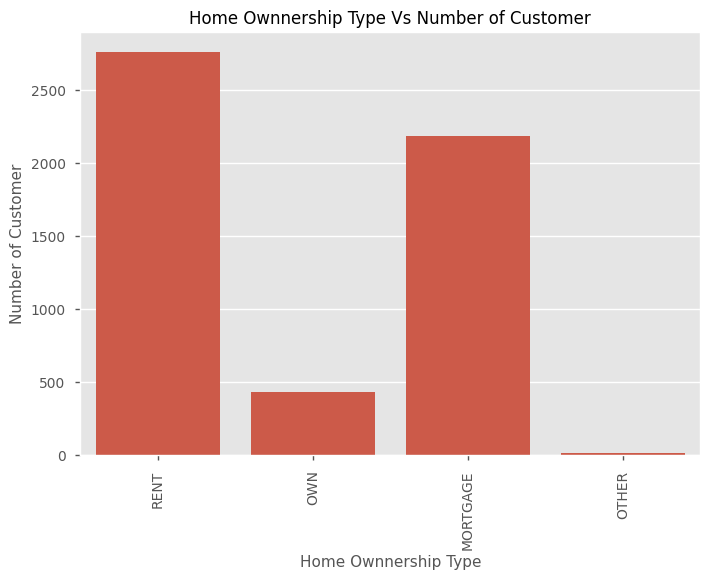

In [225]:
sns.countplot(x='home_ownership', data=charged_off)
plt.xticks(rotation=90)
plt.ylabel("Number of Customer")
plt.xlabel("Home Ownnership Type")
plt.title("Home Ownnership Type Vs Number of Customer")
plt.show()

### Verification Status

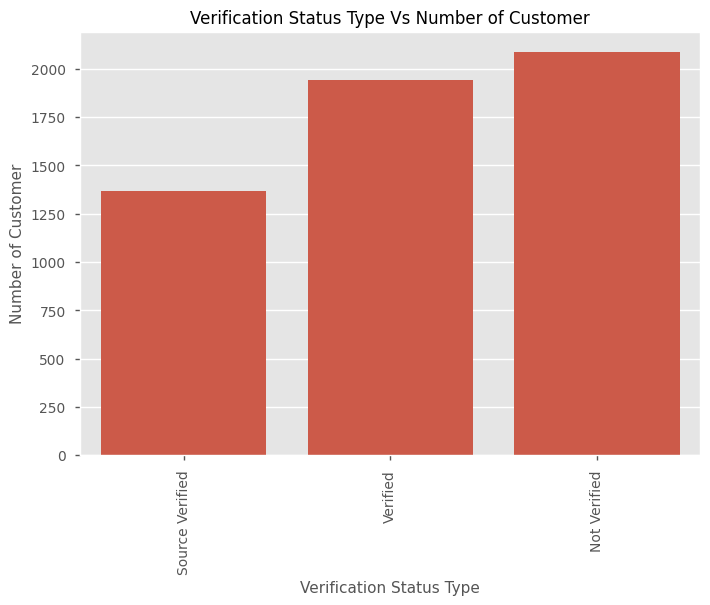

In [226]:
sns.countplot(x='verification_status', data=charged_off)
plt.xticks(rotation=90)
plt.ylabel("Number of Customer")
plt.xlabel("Verification Status Type")
plt.title("Verification Status Type Vs Number of Customer")
plt.show()

### Loan Issue Month

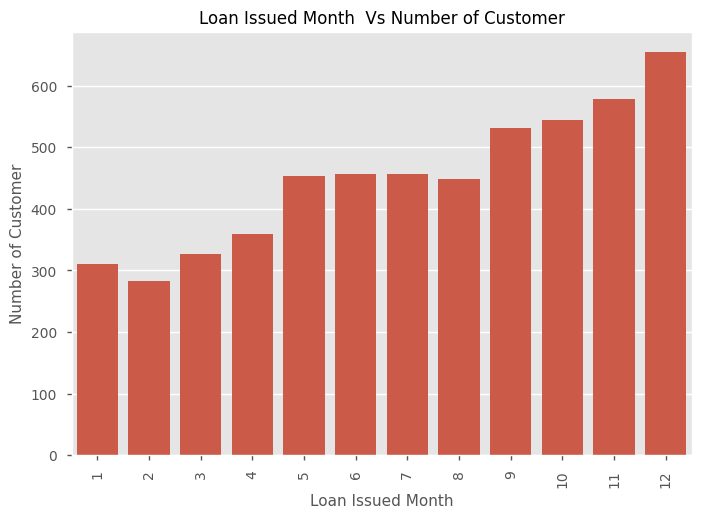

In [227]:
sns.countplot(x='issue_month', data=charged_off)
plt.xticks(rotation=90)
plt.ylabel("Number of Customer")
plt.xlabel("Loan Issued Month")
plt.title("Loan Issued Month  Vs Number of Customer")
plt.show()

### Loan Issue Year

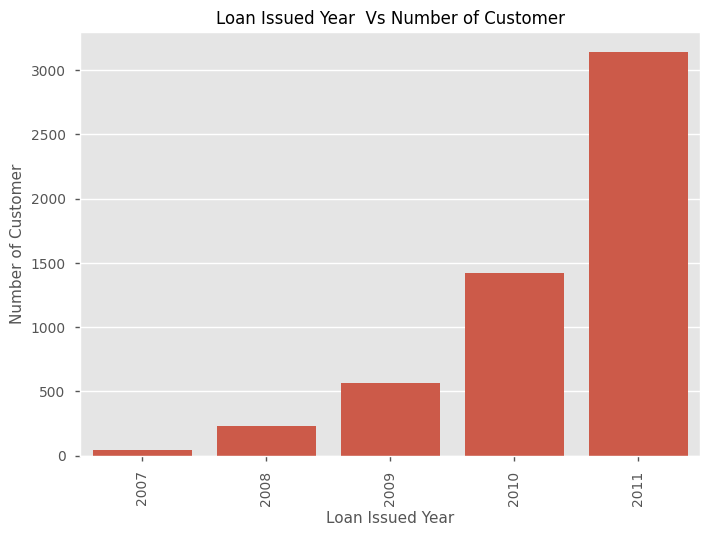

In [228]:
sns.countplot(x='issue_year', data=charged_off)
plt.xticks(rotation=90)
plt.ylabel("Number of Customer")
plt.xlabel("Loan Issued Year")
plt.title("Loan Issued Year  Vs Number of Customer")
plt.show()

### Loan Grade vs Loan Sub-Grade

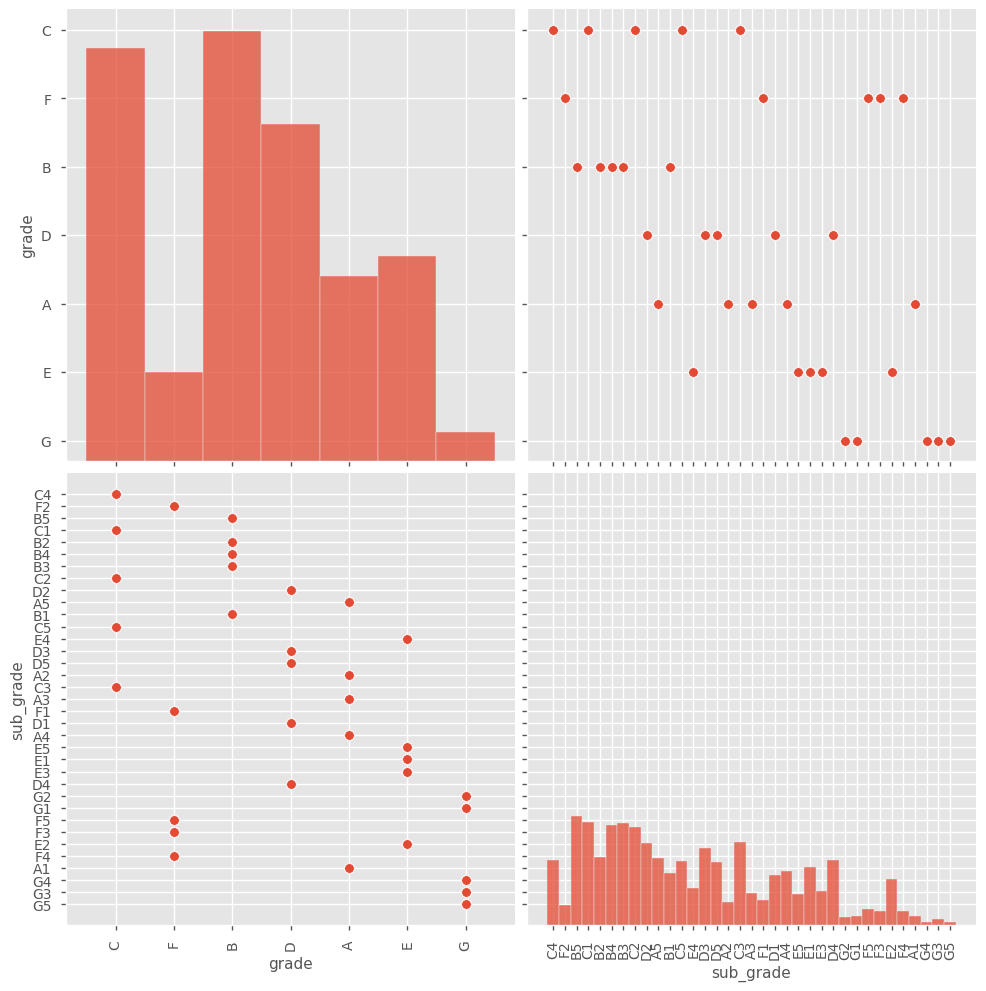

In [229]:
g= sns.pairplot(charged_off, hue_order="smoker",markers=["o", "s"], vars=['grade', 'sub_grade'], height=5)
for ax in g.axes.flat:
    ax.tick_params(axis='x', labelrotation=90)

plt.show()

In [230]:
# See if we can group categories for any data values
sns.pairplot(charged_off[['loan_status', 'loan_amnt', 'funded_amnt_inv','int_rate', 'installment', 'annual_inc']], hue_order="smoker",markers=["o", "s"],diag_kind="hist", kind="scatter", height=5)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

### Analysis summary - Drivers where customers have defaulted

##### Loan Issue Month
* Customers defaulted where 'Month of Loan Issue' is December.
##### Loan Amount
* Customers defaulted where 'Loan Amount' falls in the range of 6k-8k
##### Rate of Interest
* Customers defaulted where 'Rate of Interest' falls between 11% to 13%
##### Loan Amount Invoiced
* Customers defaulted where 'Loan Amount Invoiced' falls in the range of 6k-8k
##### Debt Obligation(dti)
* Customers defaulted where 'Debt Obligation(dti)' ration falls between 11 to 17
##### Number of Credit Line
* Customers defaulted where their 'No of Credit Line (open_acc)' falls between 6 to 9
##### Revolving Line Utilization
* Customers defaulted where their 'Revolving Line Utilization rate(revol_util)' falls between 65 to 85

### Analysis Observation

* 'Loan Amount' decreases with an increase in 'Invoiced Funded Amount'.
* 'Number of Installment' increases with an increason in 'Invoiced Funded Amount'.
* 'Loan Amount' increases with increase in 'Number of Installments'

### Employment length VS Loan Amount

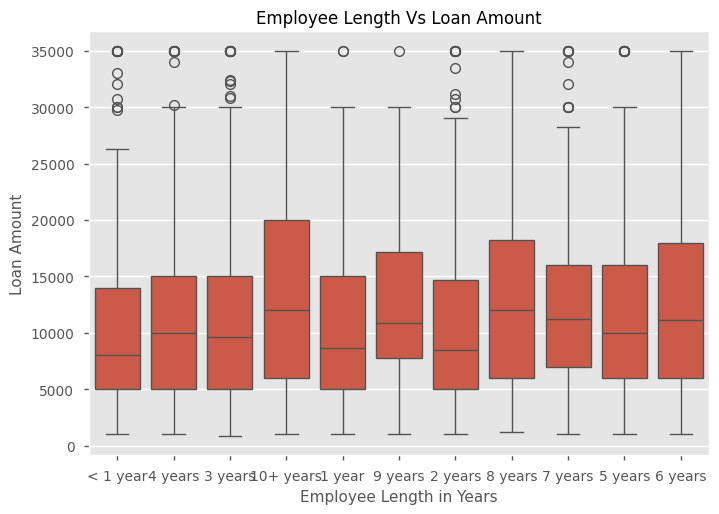

In [231]:
sns.boxplot(data=charged_off, x="emp_length", y="loan_amnt")
plt.ylabel("Loan Amount")
plt.xlabel("Employee Length in Years")
plt.title("Employee Length Vs Loan Amount")
plt.show()

In [232]:
df_var = df[["loan_amnt",
 "funded_amnt_inv",
 "term",
 "int_rate",
 "installment",
 "annual_inc",
 "dti",
 "inq_last_6mths",
 "open_acc",
 "pub_rec",
 "revol_util",
 "total_acc",
 "issue_year",
 "issue_month"]]

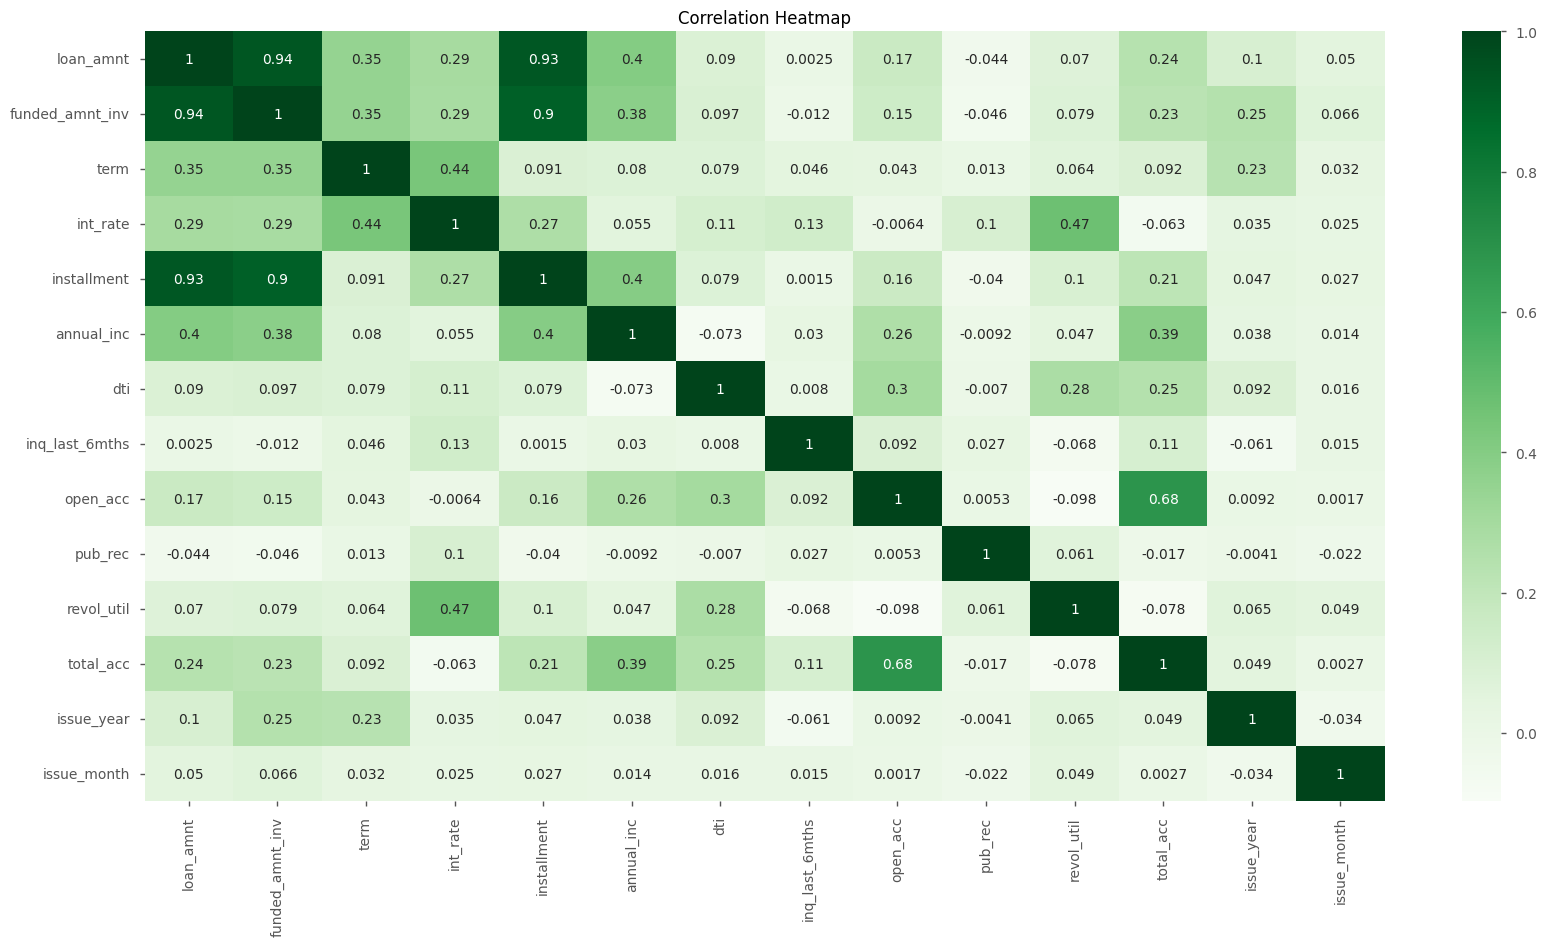

In [233]:
# plotting correlation heatmap
plt.figure(figsize=[20,10])

dataplot = sns.heatmap(df_var.corr(),cmap = "Greens", annot=True)
plt.title("Correlation Heatmap")

plt.show()


In [234]:
pd.pivot_table(charged_off,
               index=['home_ownership', 'issue_year'],
               values=['loan_amnt','funded_amnt_inv','int_rate','installment','annual_inc','dti','open_acc', 'revol_util'])

annual_inc        dti  funded_amnt_inv  \
home_ownership issue_year                                             
MORTGAGE       2007        62946.470588  16.487647      1037.410000   
               2008        70630.727273  13.463333      2741.031414   
               2009        64765.226316  12.788789      9115.938316   
               2010        66515.048696  13.886591     10811.981722   
               2011        66755.282659  14.878289     14200.740008   
OTHER          2008        45000.000000  11.955000      2015.645000   
               2009        62107.916667  12.071667      9397.829167   
               2010        41250.000000  21.500000     11975.000000   
               2011        32000.000000  17.930000     11475.000000   
OWN            2007        69100.000000   9.505000       720.127500   
               2008        57142.076923  10.800000      1790.384615   
               2009        46371.813953  14.360465      7401.744186   
               2010        47013.747967  13.115528      8645.737480   
               2011        51103.405622  14.470482     11609.305783   
RENT           2007        52142.000000  10.462000       979.803000   
               2008        50979.352941  12.787227      2479.590504   
               2009        50901.783699  13.149624      8100.452226   
               2010        47559.640000  13.283117      8811.959903   
               2011        49990.105063  14.508563     10707.400797   

                           installment   int_rate     loan_amnt   open_acc  \
home_ownership issue_year                                                    
MORTGAGE       2007         334.114118  11.761765  11370.588235   9.764706   
               2008         362.817980  11.985455  11927.272727  11.626263   
               2009         377.247000  12.873947  11185.789474   9.984211   
               2010         321.721478  13.104052  12001.000000  10.302609   
               2011         390.067357  14.218212  15013.044309  10.209320   
OTHER          2008         404.515000  10.710000  13750.000000   7.000000   
               2009         453.265833  13.666667  13312.500000   9.916667   
               2010         403.930000  11.975000  12100.000000   9.500000   
               2011         282.050000  16.490000  16000.000000  10.000000   
OWN            2007         391.375000  12.332500  11631.250000  10.000000   
               2008         354.441538  11.376154  11596.153846   8.769231   
               2009         306.393256  13.608837   9168.604651   8.953488   
               2010         259.396992  13.103496   9364.024390   8.284553   
               2011         326.618755  14.112129  12070.883534   8.746988   
RENT           2007         303.740000  11.334500   9353.750000   7.800000   
               2008         314.994874  11.743361   9979.831933   8.504202   
               2009         327.417900  13.088527   9706.818182   8.507837   
               2010         270.081517  13.526676   9593.206897   7.846897   
               2011         304.710323  14.278247  11049.398734   8.388608   

                          revol_util  
home_ownership issue_year             
MORTGAGE       2007        35.158824  
               2008        50.657576  
               2009        51.589632  
               2010        55.142052  
               2011        56.087976  
OTHER          2008            58.25  
               2009        42.191667  
               2010             46.6  
               2011             45.7  
OWN            2007             47.0  
               2008        47.107692  
               2009        47.369767  
               2010        52.752846  
               2011        53.335743  
RENT           2007           57.715  
               2008        50.889076  
               2009        50.017868  
               2010        54.885779  
               2011        58.337475

### Observation - Scenarios where customers defaulted. (Based on above analysis)

* Customers with 'Mortgages home' and higher annual income in year 2008 - defaulted the most.
* Customers with 'Mortgages home' and higher annual income in year 2011 - defaulted the most.
* Customers with 'Other home' with higher Loan Amount in year 2011 - defaulted the most.
* For customers with 'Mortgages home'; Funded Invoiced Amount, Number of Installments, Rate of Interest, Loan Amount, Revolving Line Utilization Rate rapidly increased every year. Thus increasing the chances of rate of 'Defaults'

In [235]:
df.groupby(['purpose','loan_status', 'issue_year'])['loan_amnt'].mean().sort_values(ascending=False)

purpose         loan_status  issue_year
medical         Fully Paid   2007          18000.000000
major_purchase  Charged Off  2007          16000.000000
small_business  Charged Off  2011          15734.179688
                             2007          15662.500000
house           Charged Off  2008          15000.000000
                                               ...     
vacation        Fully Paid   2007           4366.666667
moving          Fully Paid   2007           4233.333333
vacation        Charged Off  2009           2500.000000
educational     Charged Off  2007           1950.000000
wedding         Charged Off  2007           1900.000000
Name: loan_amnt, Length: 127, dtype: float64

In [236]:
 df.groupby(['purpose','loan_status', 'issue_year'])['annual_inc'].mean().sort_values(ascending=False)

purpose           loan_status  issue_year
renewable_energy  Fully Paid   2009          88720.800000
major_purchase    Charged Off  2007          86400.000000
vacation          Charged Off  2009          85000.000000
home_improvement  Charged Off  2007          80666.666667
                  Fully Paid   2007          80390.909091
                                                 ...     
educational       Charged Off  2010          37603.529412
moving            Fully Paid   2007          36458.666667
car               Fully Paid   2007          29000.000000
medical           Fully Paid   2007          27000.000000
educational       Charged Off  2007          20560.000000
Name: annual_inc, Length: 127, dtype: float64

### Observation - Scenarios where load was fully paid

* In year 2007 customers with 'Highest Income' FULLY_PAID the loan in 'renewable_energy' sector.
* In year 2009 customers with 'Highest Income' FULLY_PAID the loan in 'renewable_energy' sector.

In [237]:
pd.pivot_table(charged_off,
               index=['home_ownership', 'grade'],
               values=['loan_amnt','funded_amnt_inv','int_rate','installment','annual_inc','dti','open_acc', 'revol_util'])

annual_inc        dti  funded_amnt_inv  installment  \
home_ownership grade                                                          
MORTGAGE       A      58603.126923  13.792077      7862.160038   245.611615   
               B      64025.895018  13.778363     10735.144199   320.478078   
               C      66402.077947  14.804525     11457.294202   342.023536   
               D      67251.230392  14.504069     12656.555196   395.993505   
               E      72346.880597  15.112239     16471.103881   480.812724   
               F      78215.519380  14.963488     19204.874341   573.172016   
               G      79259.891892  13.213784     18034.485676   557.552432   
OTHER          A      47500.000000  15.670000     10712.500000   415.880000   
               B      59985.400000  12.410000      8514.302000   403.280000   
               C      46400.000000   7.785000      3715.645000   496.335000   
               D      55413.600000  16.050000     10150.488000   340.328000   
               E      50000.000000  17.780000      9050.000000   446.580000   
               F      85000.000000   4.930000     11950.000000   902.500000   
OWN            A      45126.365385  13.015577      7425.450385   230.731923   
               B      45631.982143  13.371250      8925.340804   262.430625   
               C      45588.934579  13.832056      8235.456636   273.940841   
               D      53359.346154  14.564744     10646.277564   335.294615   
               E      60996.764706  14.659804     13223.371961   381.637843   
               F      55610.954545  13.723636     15084.010000   448.019545   
               G      68900.000000  17.224000     19496.807000   640.715000   
RENT           A      44211.121864  13.140645      6656.236237   212.292724   
               B      46786.850789  14.217575      8760.434605   277.606714   
               C      48320.915452  14.342041      8568.323163   284.661574   
               D      51428.571672  13.628669      9511.271638   303.014181   
               E      53167.262687  13.842776     12112.875403   355.856687   
               F      59201.201493  13.683507     15286.255149   436.403582   
               G      61685.521739  13.208478     14876.448478   478.285652   

                       int_rate     loan_amnt   open_acc revol_util  
home_ownership grade                                                 
MORTGAGE       A       7.512731   8453.846154   9.965385  37.698077  
               B      11.085872  12152.090747   9.875445  46.631851  
               C      13.607947  12887.595057   9.992395  56.641635  
               D      15.841446  14344.975490  10.524510  61.448873  
               E      17.965448  18404.291045  10.570896  67.683694  
               F      19.963101  21294.573643  11.333333  69.484496  
               G      21.199730  19286.486486  13.945946  69.316216  
OTHER          A       8.755000  13100.000000   9.000000      26.35  
               B      11.190000  12830.000000   9.000000       43.9  
               C      11.935000  15000.000000   8.500000       41.3  
               D      15.726000  11300.000000   9.800000       57.7  
               E      16.000000  12800.000000  14.500000      54.15  
               F      17.900000  25000.000000   4.000000       10.1  
OWN            A       7.485769   7608.173077   8.019231  31.030769  
               B      11.111429   9760.714286   8.919643  43.163393  
               C      13.569907   9549.532710   8.420561  51.957944  
               D      15.906795  11850.961538   8.371795  60.266667  
               E      18.166863  14275.000000   9.470588  71.164706  
               F      20.162727  16090.909091   8.363636  74.177273  
               G      21.151000  23192.500000   9.900000       63.7  
RENT           A       7.670681   7038.440860   8.455197  36.377921  
               B      11.156729   9630.236729   8.512195   47.45462  
               C      13.614315   9704.045190   8.31

### Home Ownership - Grade Vs Annual Income

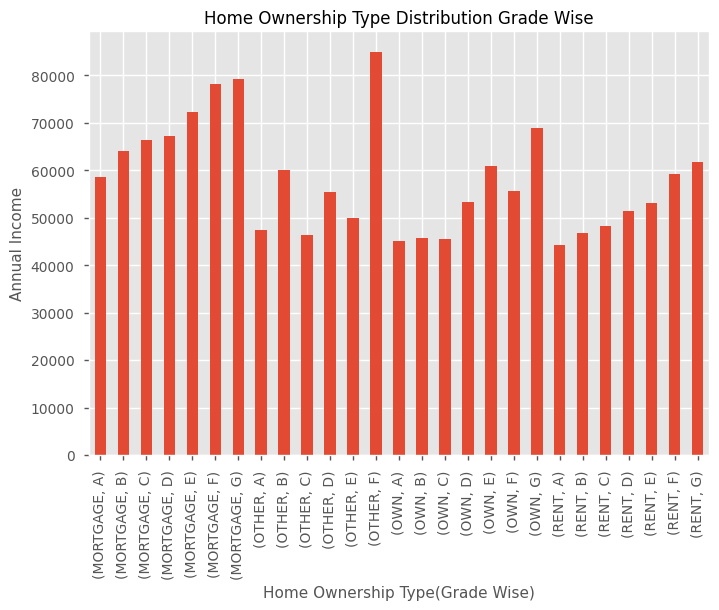

In [238]:
charged_off.groupby(['home_ownership', 'grade'])['annual_inc'].mean().plot.bar()
plt.ylabel("Annual Income")
plt.xlabel("Home Ownership Type(Grade Wise)")
plt.title("Home Ownership Type Distribution Grade Wise")
plt.show()

### Home Ownership - Grade Vs Loan Amount

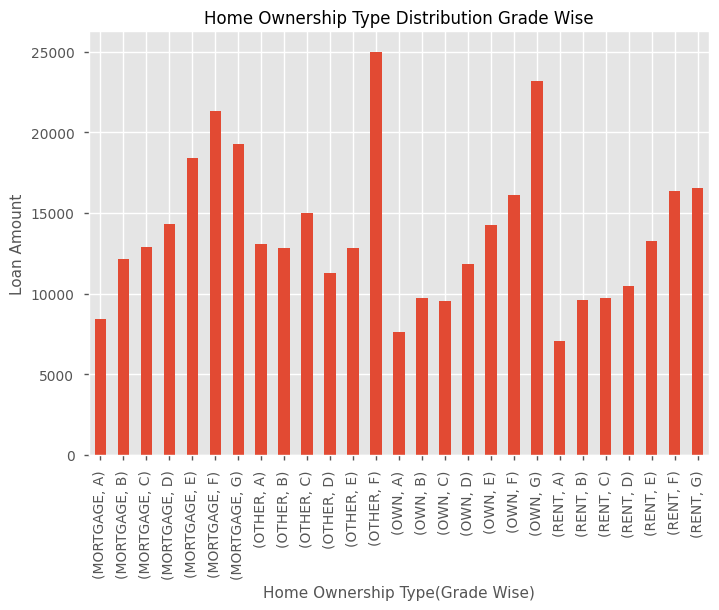

In [239]:
charged_off.groupby(['home_ownership', 'grade'])['loan_amnt'].mean().plot.bar()
plt.ylabel("Loan Amount")
plt.xlabel("Home Ownership Type(Grade Wise)")
plt.title("Home Ownership Type Distribution Grade Wise")
plt.show()

### Home Ownership - Verfication Status Vs Annual Income

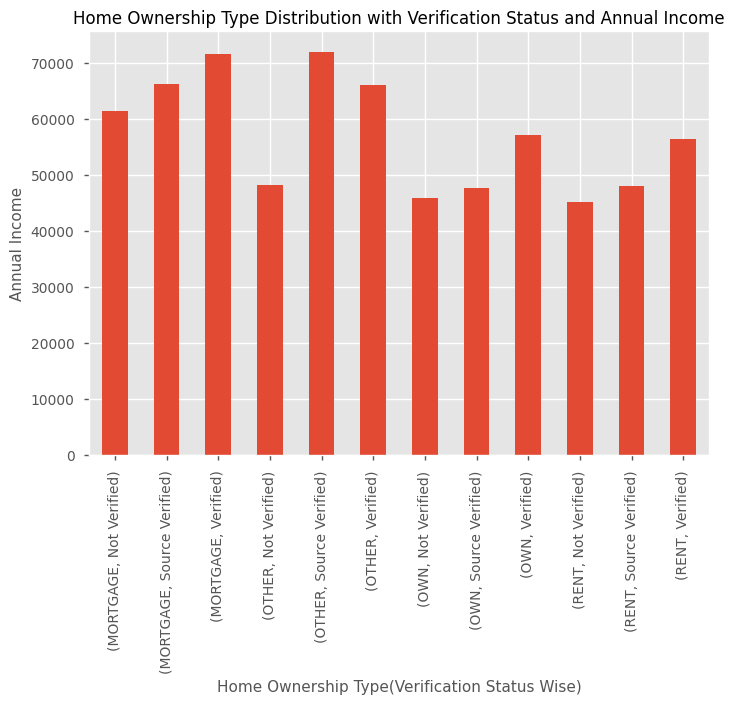

In [240]:
charged_off.groupby(['home_ownership', 'verification_status'])['annual_inc'].mean().plot.bar()
plt.ylabel("Annual Income")
plt.xlabel("Home Ownership Type(Verification Status Wise)")
plt.title("Home Ownership Type Distribution with Verification Status and Annual Income")
plt.show()

#### Observation: Customers with highest income lived in all types of homes.

* Customer's Annual Income is highest where they have a 'mortgaged home' and loan application was verified.
* Customer's Annual Income is highest where they have a 'Other home' and loan application was Source verified.
* Customer's Annual Income is highest where they have a 'Own home' and loan application was verified.
* Customer's Annual Income is highest where they have a 'Rented home' and loan application was verified.

# Conclusion & Recommendation

### Drivers for "Loan Default" and "not to Default"

#### Who is NOT likely to Default?

* Customers who 'FULLY_PAID' their loans are less likely to Default

#### Who is likely to Default?

* "Grade": Customers with assigned Loan in "Grade B".
* "Loan Amount": Customers whose loan fall in range of 6k-8k.
* "House Ownership": Customers staying in Rented or Mortaged home.
* "Loan Term Period": Customers with average 3 years of loan term.
* "Years of Experience": Customers with work experience of 10+ years.
* "Loan Verification:" Customers whose loan application is 'not verified'